In [1]:
import parallelPermutationTest as ppt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from plots import timePlotSNS
import time

### Get synthetic data

In [2]:
n_samples = 5
n = m =  500
bins =  [50, 100, 200,250,300,350,400,450,500]
data_variables = (n, n_samples, bins)

In [3]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [4]:
def runExperiment(method_list, names_list, data, data_variables):
    
    n, n_samples, bins = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for b in bins:
                
                A = np.asarray(data(n, 1))
                B = np.asarray(data(n, 1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B,b)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
    return method_dict
    

In [5]:
method_list = [ppt.GreenFloat, ppt.GreenFloatMultiThread, ppt.GreenFloatCuda, ppt.CoinShiftFloat]
names_list = ["GreenFloat", "GreenFloatMultiThread", "GreenFloatCuda", "CoinShiftFloat"]
method_dict = runExperiment(method_list, names_list, data, data_variables)
    


In [6]:
np.allclose(np.asarray(method_dict["GreenFloat"]["p_values"]),
                np.asarray(method_dict["GreenFloatMultiThread"]["p_values"]),
                np.asarray(method_dict["GreenFloatCuda"]["p_values"]),
                np.asarray(method_dict["CoinShiftFloat"]["p_values"]))
             
    

True

In [7]:
TimeList_list = [method_dict["GreenFloat"]["time"], 
                 method_dict["GreenFloatMultiThread"]["time"],
                 method_dict["GreenFloatCuda"]["time"],
                 method_dict["CoinShiftFloat"]["time"]]
NameList = ["Green", "Green Multithreading", "Green Cuda", "Coin Shift"]

In [8]:
rep_bins = bins * n_samples

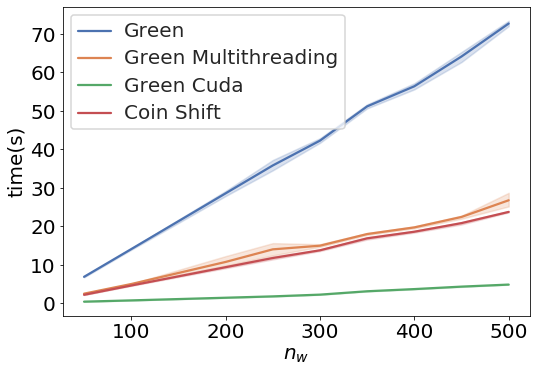

In [9]:
timePlotSNS(TimeList_list, NameList, rep_bins, 'time(s)',  r"$n_{w}$", log=False, path="./figures/experiemnt1/TimeVsbins_linear")


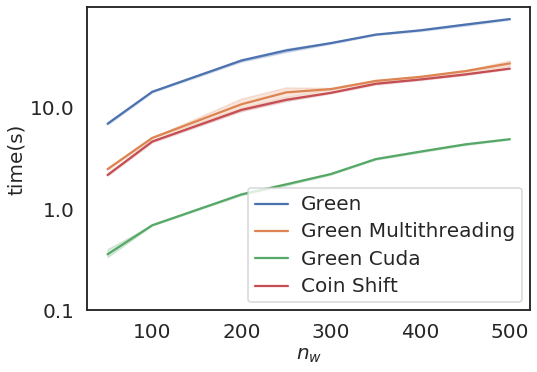

In [10]:
timePlotSNS(TimeList_list, NameList, rep_bins, 'time(s)',  r"$n_{w}$", log=True, path="./figures/experiemnt1/TimeVsbins_log")

In [11]:
n_samples = 5
N_list = [50, 100, 200,250,300,350,400,450,500]
data_variables = (N_list, n_samples, bins)

In [12]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [13]:
def runExperiment(method_list, names_list, data, data_variables):
    
    N_list, n_samples, bins = data_variables
    
    method_dict = dict()
    
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for i in range(n_samples):
            
            np.random.seed(i)
            
            for n in N_list:
                
                A = np.asarray(data(n, 1))
                B = np.asarray(data(n, 1))
        
                start = time.time()
                method_dict[name]["p_values"].append(method(A,B)[0])
                end = time.time()
                method_dict[name]["time"].append(end - start)
    return method_dict
    

In [16]:
method_list = [ppt.GreenInt, ppt.GreenIntMultiThread, ppt.GreenIntCuda, ppt.CoinShiftInt]
names_list = ["GreenInt", "GreenIntMultiThread", "GreenIntCuda", "CoinShiftInt"]
method_dict = runExperiment(method_list, names_list, data, data_variables)
    

In [17]:
TimeList_list_N = [method_dict["GreenInt"]["time"], 
                 method_dict["GreenIntMultiThread"]["time"],
                 method_dict["GreenIntCuda"]["time"],
                 method_dict["CoinShiftInt"]["time"]]
NameList_N = ["Green", "Green Multithreading", "Green Cuda", "Coin Shift"]

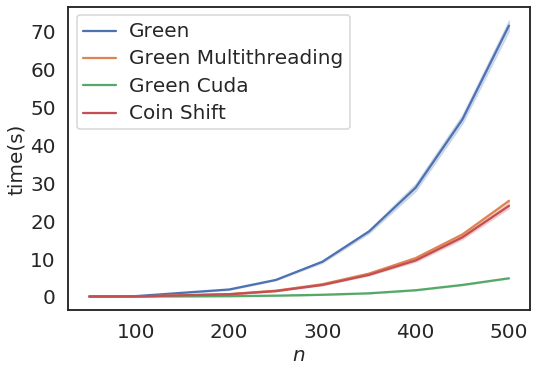

In [18]:
timePlotSNS(TimeList_list_N, NameList_N, rep_bins, 'time(s)',  r"$n$", log=False, path="./figures/experiemnt1/TimeVSetSize_linear")


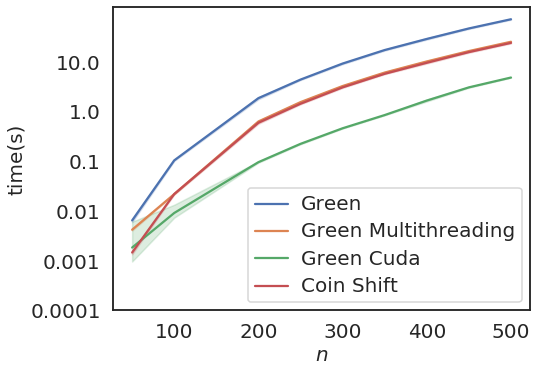

In [19]:
timePlotSNS(TimeList_list_N, NameList_N, rep_bins, 'time(s)',  r"$n$", log=True, path="./figures/experiemnt1/TimeVSetSize_log")